#  <font color='purple'>Projet 5: Optimisez la gestion des données d'une boutique avec R ou Python

# Table des matières

* **[ Importation des librairies et chargement des fichiers](#Etape1)**
    * [Importation des librairies nécessaires au projet](#section_1_1)
    * [Chargement des fichiers Excel](#section_1_2)
* **[Analyse exploratoire des fichiers](#Etape2)**
    * [Analyse exploratoire du fichier erp](#section_2_1)
    * [Analyse exploratoire du fichier web](#section_2_2)
    * [Analyse exploratoire du fichier liason](#section_2_3)
* **[  Nettoyage du jeu de données](#Etape3)**
    * [ Erreurs de type](#section_3_1)
    * [ Valeurs manquantes](#section_3_2)
    * [Doublons](#section_3_3)
* **[ Rapprochement des exports erp et web via liaison](#Etape4)**  
    * [ Création d'un dataframe avec erp et liaison](#section_4_1)
    * [ Création d'un dataframe avec erp et web](#section_4_2)
* **[ Calcul du chiffre d'affaires](#Etape5)**     
    * [ Calcul du chiffre d'affaires par produit](#section_5_1)
    * [ Calcul du chiffre d'affaires total](#section_5_2)
* **[ Détection de valeurs aberrantes et représentation graphique](#Etape6)**         

# <font color='purple'> Etape 1 - Importation des librairies et chargement des fichiers<a class="anchor" id="Etape1">

##  <font color='purple'>1.1 - Importation des librairies<a class="anchor" id="section_1_1">

In [398]:
from IPython.display import display, HTML

* Importation de la librairie Pandas

In [399]:
import pandas as pd

* Importation de la librairie NumPy

In [400]:
import numpy as  np

* Importation de la librairie Matplotlib.pyplot

In [401]:
import matplotlib.pyplot as plt

##  <font color='purple'>1.2 - Chargement des fichiers Excel<a class="anchor" id="section_1_2">

* Importation du fichier erp.xlsx

In [402]:
erp = pd.read_excel('erp.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [403]:
type(erp)

pandas.core.frame.DataFrame

* Importation du fichier web.xlsx

In [404]:
web = pd.read_excel('web.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [405]:
type(web)

pandas.core.frame.DataFrame

* Importation du fichier liaison.xlsx

In [406]:
liaison= pd.read_excel('liaison.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [407]:
type(liaison)

pandas.core.frame.DataFrame

# <font color='purple'> Etape 2 - Analyse exploratoire des fichiers<a class="anchor" id="Etape2">

## <font color='purple'> 2.1 - Analyse exploratoire du fichier erp<a class="anchor" id="section_2_1">

* Affichage les 5 premières lignes de la table

In [408]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


* Affichage  les dimensions du dataset

In [409]:
erp.shape

(825, 5)

In [410]:
print("Le dataframe erp comporte {} observation(s) ou article(s)".format(erp.shape[0]))
print("Le dataframe erp {} colonne(s)".format(erp.shape[1]))

Le dataframe erp comporte 825 observation(s) ou article(s)
Le dataframe erp 5 colonne(s)


In [411]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


## <font color='purple'> 2.2 - Analyse exploratoire du fichier web<a class="anchor" id="section_2_2">

L'objectif de cette étape est d'avoir une vue globale sur la forme et le contenu de chaque dataframe afin de procéder à un eventuel nettoyage.


* Affichage les 5 premières lignes de la table

In [412]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


* Affichage  les dimensions du dataset

In [413]:
web.shape

(1513, 28)

In [414]:
print("Le dataframe web comporte {} observation(s) ou article(s)".format(web.shape[0]))
print("Le dataframe web {} colonne(s)".format(web.shape[1]))

Le dataframe web comporte 1513 observation(s) ou article(s)
Le dataframe web 28 colonne(s)


In [415]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

## <font color='purple'> 2.3 - Analyse exploratoire du fichier liaison<a class="anchor" id="section_2_3">

* Affichage les 5 premières lignes de la table

In [416]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


* Affichage les dimensions du dataset

In [417]:
liaison.shape

(825, 2)

In [418]:
print("Le dataframe liaison comporte {} observation(s) ou article(s)".format(liaison.shape[0]))
print("Le dataframe liaison comporte {} colonne(s)".format(liaison.shape[1]))

Le dataframe liaison comporte 825 observation(s) ou article(s)
Le dataframe liaison comporte 2 colonne(s)


In [419]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


# <font color='purple'> Etape 3 -  Nettoyage du jeu de données<a class="anchor" id="Etape3">

Nous procederons au nettoyage de notre jeu de donnnées afin de préparer au mieux leur fusion ultérieure.

## <font color='purple'> 3.1 - Erreurs de type<a class="anchor" id="section_3_1">

### <font color='blue'> Dataframe erp

In [420]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

onsale_web peut être considéré comme booléen (onsale_web : 1 = en vente sur le site, 0= pas en vente sur le site).

* Changement du type de la colonne product_id en object

Nous constatons que la variable 'product_id' qui est une variable qualitative est de type entier(int64) , nous la mettrons ici en type object.

In [421]:
erp['product_id']=erp['product_id'].astype('object')

In [422]:
# Verification du changement de type
erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

###  <font color='blue'>Dataframe web

In [423]:
web.dtypes

sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


###  <font color='blue'>Dataframe liaison

In [424]:
liaison.dtypes

product_id     int64
id_web        object
dtype: object

* Changement du type de la colonne product_id en object

Nous ferons de même que dans le dataframe erp, en changeant de type de la variable 'product_id' de int64 à object.

In [425]:
liaison['product_id']=liaison['product_id'].astype('object')

In [426]:
# Verification du changement de type
liaison.dtypes

product_id    object
id_web        object
dtype: object

Nous allons renommé la variable 'id_web' par 'sku' pour garder la continuité avec le dataframe web

In [427]:
#Changement de la colonne id_web en sku
liaison.rename(columns={"id_web":"sku"},inplace=True)

## <font color='purple'> 3.2 - Valeurs manquantes<a class="anchor" id="section_3_2">

###  <font color='blue'>Dataframe erp

In [428]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

Le dataframe erp n'a pas de valeurs manquantes

###  <font color='blue'>Dataframe web

In [429]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

Le dataframe web a plusieurs variables avec des valeurs manquantes que nous regarderons plus en détail plutard.

###  <font color='blue'>Dataframe liaison

In [430]:
liaison.isnull().sum()

product_id     0
sku           91
dtype: int64

La variable 'sku' a 91 valeurs manquantes car certains product_id n'ont pas de correspondance dans sku.En fait il s'agit des références de produits non disponibles sur le site web, ce qui correspond à "0" dans la colonne onsale_web du dataframe erp.


## <font color='purple'> 3.3 - Doublons<a class="anchor" id="section_3_3"> 

* Création d'une fonction pour tester l'unicité de la clé primaire dans chaque dataframe

In [431]:
def test(df, colonnes):
    # On compare la taille du dataframe avant et après suppression des doublons
    if df.size == df.drop_duplicates(colonnes).size :
        print("La clé n'est pas présente plusieurs fois dans le dataframe.")
        print("Elle peut donc être utilisée comme clé primaire.".format(colonnes))
    else :
        print("La clé est présente plusieurs fois dans le dataframe.")
        print("Elle ne peut donc pas être utilisée comme clé primaire.".format(colonnes))
    
    # Affichage du nombre de lignes et colonnes du dataframe
    print("Le dataframe est de la forme : {} (lignes, colonnes)".format(df.shape))

###  <font color='blue'>Dataframe erp

In [432]:
erp.loc[erp['product_id'].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


In [433]:
#Vérification de la taille du datafrmae avant et après dédoublonnage
print(erp.size)
erp.drop_duplicates(['product_id']).size

4125


4125

Le dataframe erp comporte 4125 valeurs avant et après dédoublonnage, il ne contient alors aucun doublons.

In [434]:
#Test de la clé primaire
test(erp,['product_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (825, 5) (lignes, colonnes)


La clé primaire est bien unique.

###  <font color='blue'>Dataframe web

In [435]:
web.loc[web['sku'].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [436]:
#Vérification de la taille du dataframe avant et après dédoublonnage
print(web.size)
web.drop_duplicates(['sku']).size

42364


20020

Le dataframe web a 42364 valeurs avant dédoublonnage et 20020 après,il contient alors des doublons.

In [437]:
#Test de la clé primaire 
test(web,['sku'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (1513, 28) (lignes, colonnes)


* Recherche d'un dataframe web sans doublons

In [438]:
# Observation des valeurs NaN de la colonne ['sku'] par la création d'un nouveau dataframe 
web_null = web[web['sku'].isnull()]
web_null.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


On constate qu'il 5 sku qui ont des valeurs en NaN, mais nous allons vérifier s'il y a des colonnes contenant des informations présentes dans ses lignes.

In [439]:
# Observation des données filtrées
print(web_null.shape)
print('')
web_null.info()

(85, 28)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        

In [440]:
# vérification de lignes avec informations dans tout le nouveau dataset par la création d'un nouveau dataframe:web_obs
web_obs = web_null[web_null['post_name'].notnull()]
print(web_obs.shape)
web_obs

(2, 28)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Nous observons que malgré la présence du sku en NaN(pas un nombre), nous avons bien 2 lignes qui contiennent des informations.Nous ne pouvons donc pas les supprimer mais seront stocker dans ce dataframe web_obs.

In [441]:
# Création d'un nouveau dataframe afin de conserver uniquement les lignes de 'sku' non_null
web_notnull = web[web['sku'].notnull()]
web_notnull.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [442]:
# Observation des données filtrées
print(web_notnull.shape)
print('')
web_notnull.info()

(1428, 28)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1428 non-null   int64         
 2   downloadable           1428 non-null   int64         
 3   rating_count           1428 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object     

In [443]:
# Observation du df web_notnull en testant de la clés primaire. 
test(web_notnull, ['sku'])

La clé est présente plusieurs fois dans le dataframe.
Elle ne peut donc pas être utilisée comme clé primaire.
Le dataframe est de la forme : (1428, 28) (lignes, colonnes)


On constate que la clé n'est toujours pas validée, nous allons continuer l'observation des données (nombre de lignes....).

In [444]:
# Observation de la colonne post_type
web_notnull['post_type'].unique()

array(['product', 'attachment'], dtype=object)

Dans cette colonne, nous remarquons que certaines lignes correspondent à des produits tandis que d'autres sont des pièces jointes(attachment), qui sont en fait des liens vers des images illustrant le produit. Ces dernières peuvent être supprimées sans aucune conséquence.

Nous allons mettre en place un filtre sur le dataframe nommé web_notnull, en conservant uniquement les lignes où la colonne "post_type" est égale à "product". Le résultat de cette opération sera assigné à un nouveau DataFrame, que nous appellerons web_product.

Pour être plus précis, le code utilise la méthode .loc de Pandas afin de ne sélectionner que les lignes de web_notnull qui répondent à la condition 'post_type'=='product'. Cela aboutit à un nouveau dataframe qui n'inclut que les lignes où "post_type" est "product".

En somme, ce code vise à filtrer les données d'un dataframe pour ne retenir que les lignes qui correspondent à un type de produit spécifique.

In [445]:
# Ajustement du dataframe en selectionnant un seul type.On garde les prduits et on enlève les attachements des postes
web_product=web_notnull.loc[web_notnull['post_type']=='product']

In [446]:
#Test de la clé primaire dans notre nouveau df
test(web_product,'sku')

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (714, 28) (lignes, colonnes)


La clé primaire est enfin unique.

In [447]:
print(web_product.shape)
print('')
web_product.info()

(714, 28)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   rating_count           714 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        

###  <font color='blue'>Dataframe liaison

In [448]:
liaison.loc[liaison['product_id'].duplicated(keep=False),:]

,product_id,sku


Le dataframe liaison ne contient pas de doublons.

In [449]:
#Vérification de la taille du datafrmae avant et après dédoublonnage
print(liaison.size)
liaison.drop_duplicates(['product_id']).size

1650


1650

Le dataframe liaison contient 1650 valeurs avant et après dédounlonnage.

In [450]:
#Test de la clé primaire
test(liaison,['product_id'])

La clé n'est pas présente plusieurs fois dans le dataframe.
Elle peut donc être utilisée comme clé primaire.
Le dataframe est de la forme : (825, 2) (lignes, colonnes)


#  <font color='purple'>Etape 4 - Rapprochement des exports  erp et web via liaison<a class="anchor" id="Etape4">

##  <font color='purple'>4.1 - Création d'un dataframe avec erp et liaison<a class="anchor" id="section_4_1">

Nous allons effectuer une jointure externe en intégrant un indicateur que nous établirons comme étant True.

In [451]:
# Jointure entre erp et liaison
erp_liaison = pd.merge(erp, liaison, on='product_id', how='outer',indicator=True)

In [452]:
erp_liaison.shape

(825, 7)

In [453]:
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,sku,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN,both
821,7204,0,45.0,9,instock,NaN,both
822,7247,1,54.8,23,instock,13127-1,both
823,7329,0,26.5,14,instock,14680-1,both


Nous observerons le nombre de lignes qui ont trouvé une correspondance dans nos deux dataframes lors de la jointure, en sélectionnant la colonne '_merge'.

In [454]:
erp_liaison1=erp_liaison.loc[erp_liaison['_merge'] == 'both']

In [455]:
erp_liaison1.shape

(825, 7)

On constate que toutes les lignes du dataframe erp ont trouvé correspondance dans le dataframe liaison

In [456]:
# Abandon de la colonne _merge
erp_liaison_final = erp_liaison.drop(columns=['_merge'],axis=1)

In [457]:
erp_liaison_final.shape

(825, 6)

##  <font color='purple'>4.2 - Création d'un dataframe avec erp et web<a class="anchor" id="section_4_2">

In [458]:
# jointure entre erp_liaison et web
erp_liaison_web = pd.merge(erp_liaison_final, web_product, on='sku', how='outer', indicator=True)

In [459]:
erp_liaison_web.shape

(825, 34)

In [460]:
# Stockage des valeurs ayant trouvés une correspondance dans la jointure entre les dataframes erp_liaison et web
df_BottleNeck= erp_liaison_web.loc[erp_liaison_web['_merge'] == 'both']

In [461]:
df_BottleNeck

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both


In [462]:
print(df_BottleNeck.shape)
print('')
df_BottleNeck.info()

(714, 34)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 824
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    object        
 1   onsale_web             714 non-null    int64         
 2   price                  714 non-null    float64       
 3   stock_quantity         714 non-null    int64         
 4   stock_status           714 non-null    object        
 5   sku                    714 non-null    object        
 6   virtual                714 non-null    float64       
 7   downloadable           714 non-null    float64       
 8   rating_count           714 non-null    float64       
 9   average_rating         714 non-null    float64       
 10  total_sales            714 non-null    float64       
 11  tax_status             714 non-null    object        
 12  tax_class              0 non-null      float64       

In [463]:
# Stockage des valeurs qui n'ont pas trouvé de correspondance lors de la jointure entre les dataframes erp_liaison et web.
df_BottleNeck1=erp_liaison_web.loc[erp_liaison_web['_merge']!='both']
df_BottleNeck1.shape

(111, 34)

In [464]:
df_BottleNeck1.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
20,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
21,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
22,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
23,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaN,...,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [465]:
# Identification du type de jointure où certaines lignes n'ont pas trouvé de correspondance
df_BottleNeck_right=erp_liaison_web.loc[erp_liaison_web['_merge']=='right_only']
df_BottleNeck_right.shape

(0, 34)

In [466]:
df_BottleNeck_left=erp_liaison_web.loc[erp_liaison_web['_merge']=='left_only']
df_BottleNeck_left.shape

(111, 34)

Nous constatons que la jointure pour laquelle il n'y a pas eu correspondance sur toutes les lignes est de type 'left_only'.
Ce qui nous permet de conclure que tous les 'sku' du dataframe erp_liaison, n'ont pas trouvé de correspondance dans le 'sku' du web_product(des produits).

#  <font color='purple'>Etape 5 - Calcul du chiffre d'affaires<a class="anchor" id="Etape5">

## <font color='purple'>5.1 - Calcul du chiffre d'affaires par produit<a class="anchor" id="section_5_1">

In [467]:
# Calcul du chiffre d'affaires par produit
df_BottleNeck['Chiffre_affaires'] = df_BottleNeck['total_sales'] * df_BottleNeck['price']

C:\Users\Ruddy\AppData\Local\Temp\ipykernel_15308\205186514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BottleNeck['Chiffre_affaires'] = df_BottleNeck['total_sales'] * df_BottleNeck['price']


In [468]:
df_BottleNeck

,product_id,onsale_web,price,stock_quantity,stock_status,sku,virtual,downloadable,rating_count,average_rating,...,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,_merge,Chiffre_affaires
0,3847,1,24.2,0,outofstock,15298,0.0,0.0,0.0,0.0,...,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,145.2
1,3849,1,34.3,0,outofstock,15296,0.0,0.0,0.0,0.0,...,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,0.0,0.0,0.0,...,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
3,4032,1,14.1,0,outofstock,19814,0.0,0.0,0.0,0.0,...,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,42.3
4,4039,1,46.0,0,outofstock,19815,0.0,0.0,0.0,0.0,...,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,6930,1,8.4,83,instock,16135,0.0,0.0,0.0,0.0,...,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,42.0
820,7023,1,27.5,15,instock,15891,0.0,0.0,0.0,0.0,...,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
821,7025,1,69.0,2,instock,15887,0.0,0.0,0.0,0.0,...,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0
822,7247,1,54.8,23,instock,13127-1,0.0,0.0,0.0,0.0,...,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,both,0.0


In [469]:
# df pour mieux observer le chiffre d'affaires par produit
df_BottleNeck_ca=df_BottleNeck[['product_id','total_sales','price','Chiffre_affaires']]
df_BottleNeck_ca

,product_id,total_sales,price,Chiffre_affaires
0,3847,6.0,24.2,145.2
1,3849,0.0,34.3,0.0
2,3850,0.0,20.8,0.0
3,4032,3.0,14.1,42.3
4,4039,0.0,46.0,0.0
...,...,...,...,...
819,6930,5.0,8.4,42.0
820,7023,0.0,27.5,0.0
821,7025,0.0,69.0,0.0
822,7247,0.0,54.8,0.0


## <font color='purple'> 5.2 - Calcul du chiffre d'affaires total<a class="anchor" id="section_5_2">

In [470]:
# Calcul du total du chiffre d'affaires
total_CA = df_BottleNeck['Chiffre_affaires'].sum()
print("Le chiffre d'affaires total réalisé en ligne est de :", total_CA, "€.")

Le chiffre d'affaires total réalisé en ligne est de : 70568.6 €.


# <font color='purple'> Etape 6 - Détection de valeurs aberrantes et représentation graphique<a class="anchor" id="Etape6">

*  <font color='blue'>Recherche les valeurs aberrantes en utilisant la règle empirique 

Pour cette méthode,nous calculerons la moyenne et l'écart type des prix.

Les valeurs aberrante sont les données qui se situent à plus ou moins 2 écarts-types de la moyenne

In [471]:
# Calcul de la moyenne et l'écart type des prix
mean = np.mean(df_BottleNeck['price'])
std = np.std(df_BottleNeck['price'])

In [472]:
mean

32.49313725490197

In [473]:
std

27.791042941002935

In [474]:
df_BottleNeck['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

La méthode .describe nous fournit un récapitulatif statistique de base de la colonne 'price' de notre dataframe.

Ainsi, sur un total de 714 produits, le prix le plus bas est de 5.20€ et le plus élevé est de 225€. Les valeurs du premier et du troisième quartiles sont respectivement de 14.10€ et 42.17€, tandis que la médiane (ou deuxième quartile, représentant 50% de l'ensemble) est de 23.55€.

L'écart type est de 27.81€, indiquant une dispersion des prix autour de la moyenne, qui est de 32.49€. Il est à noter une divergence entre cette dernière et la médiane, signalant une distribution possiblement asymétrique des prix.

In [475]:
outlier = df_BottleNeck[(df_BottleNeck['price'] < mean - 2 * std) | (df_BottleNeck['price'] > mean + 2 * std)]

In [476]:
# Affichage des valeurs aberrantes 
print("Valeurs aberrantes :")
print(outlier['price'])
print("Le nombre total de valeurs aberrantes est de :", outlier['price'].count())

Valeurs aberrantes :
154    100.0
156     88.4
291    225.0
293    126.5
310    176.0
311    108.5
313    157.0
314    104.0
320    109.6
477    102.3
478    137.0
525    217.5
530    105.0
531    105.0
538    112.0
605     92.0
615    124.8
657    175.0
692    191.3
707     93.0
708    122.0
709    114.0
752    135.0
757    105.6
758    116.4
763    115.0
764    121.0
765     99.0
766    115.0
767    121.0
Name: price, dtype: float64
Le nombre total de valeurs aberrantes est de : 30


*  <font color='blue'>Représentation graphique des données et des valeurs aberrantes 

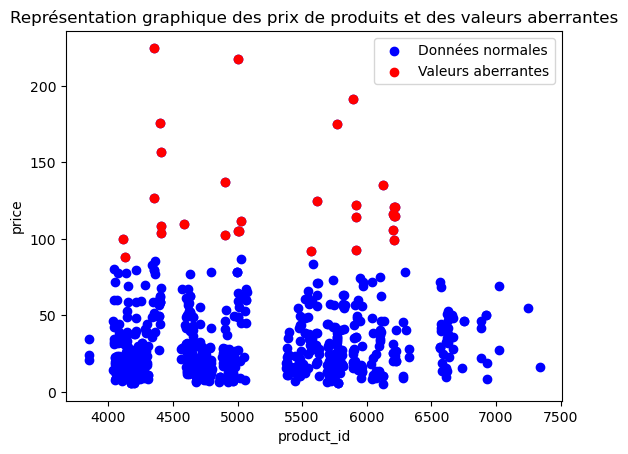

In [477]:
# Création un graphique à points (scatter plot) pour les données normales et les valeurs aberrantes
plt.scatter(df_BottleNeck['product_id'], df_BottleNeck['price'], color='blue', label='Données normales')
plt.scatter(outlier['product_id'], outlier['price'], color='red', label='Valeurs aberrantes')

# Ajout du titre
plt.xlabel('product_id')
plt.ylabel('price')
plt.title('Représentation graphique des prix de produits et des valeurs aberrantes')
plt.legend()
plt.show()

*  <font color='blue'>Méthode des inter-quartiles


Dans cette approche, nous déterminerons les valeurs du premier et du troisième quartile, ainsi que l'écart interquartile. De plus, nous établirons la valeur de la borne inférieure et celle de la borne supérieure.

Les valeurs qui se situent en dessous de la borne inférieure ou au-dessus de la borne supérieure seront traitées comme des valeurs aberrantes (outliers).




In [478]:
# Calcul du premier quartile
q1= np.percentile(df_BottleNeck['price'],25)
print("Q1=", q1, " ")

Q1= 14.1  


In [479]:
# Calcul du troisième quartile
q3= np.percentile(df_BottleNeck['price'],75)
print("Q3=", q3, " ")

Q3= 42.175000000000004  


In [480]:
# Calcul de l'inter-quartile
iqr=q3-q1
print("IQR=",iqr," ")

IQR= 28.075000000000003  


In [481]:
# Calcul de la borne inférieure
lower_bound = q1 -(1.5 * iqr)
print("lower_bound=",lower_bound," ")

lower_bound= -28.012500000000003  


In [482]:
# Calcul de la borne supérieure
upper_bound = q3 +(1.5 * iqr)
print("upper_bound=",upper_bound," ")

upper_bound= 84.28750000000001  


In [483]:
# Recherche des outliers
outliers = df_BottleNeck[(df_BottleNeck['price'] > upper_bound) | (df_BottleNeck['price'] < lower_bound)]

In [484]:
print("Le nombre total de valeurs aberrantes est de :", outliers['price'].count())
outliers['price']

Le nombre total de valeurs aberrantes est de : 32


154    100.0
156     88.4
291    225.0
293    126.5
297     85.6
310    176.0
311    108.5
313    157.0
314    104.0
320    109.6
477    102.3
478    137.0
525    217.5
530    105.0
531    105.0
538    112.0
539     86.8
605     92.0
615    124.8
657    175.0
692    191.3
707     93.0
708    122.0
709    114.0
752    135.0
757    105.6
758    116.4
763    115.0
764    121.0
765     99.0
766    115.0
767    121.0
Name: price, dtype: float64

*  <font color='blue'>Représentation graphique des données et des outliers

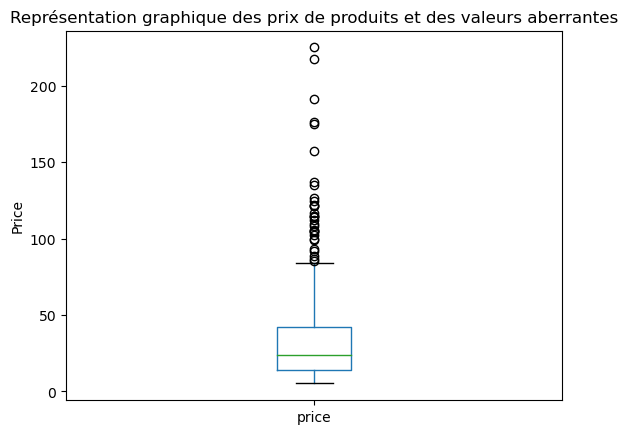

In [485]:
df_BottleNeck.boxplot(column =['price'],grid = False) 
plt.title('Représentation graphique des prix de produits et des valeurs aberrantes')
plt.ylabel('Price')
plt.show()

Étant donné que la limite inférieure est négative (-28,01), il est naturel de ne pas trouver d'outlier inférieur, puisqu'un prix ne peut pas être négatif et le prix minimal dans nos données est de 5,20€.

Pour ce qui est de la limite supérieure, elle est fixée à 84,28€. Cependant, le prix maximal de nos produits est de 225€, indiquant clairement la présence d'au moins un outlier supérieur. En fait, nous avons identifié 32 produits comme tels.

En regardant la médiane de notre graphique, il est évident que les produits à bas prix sont plus fréquents sur la boutique en ligne de BottleNeck par rapport aux produits à prix élevé.


* <font color='blue'>Observation de la liste des produits considérés comme outliers

In [486]:
# Création d'un dataframe avec uniquement les produits considérés comme des valeurs aberrantes. 
df_outliers=df_BottleNeck[['product_id','post_title','total_sales','price','stock_status','Chiffre_affaires']]

In [487]:
# Création d'un liste de valeurs aberrantes et selection à partir de la liste dans notre dataframe
liste_outliers = [154.0,100.0,88.4,225.0,126.5,85.6,176.0,108.5,157.0,104.0,109.6,102.3,137.0,217.5,105.0,105.0,112.0,86.8,92.0,124.8,175.0,191.3,93.0,122.0,114.0,135.0,105.6,116.4,115.0,121.0,99.0,115.0,121.0]
df_outliers1 = df_outliers.loc[df_outliers['price'].isin(liste_outliers), :]

In [488]:
df_outliers1.head(32)

,product_id,post_title,total_sales,price,stock_status,Chiffre_affaires
154,4115,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,0.0,100.0,instock,0.0
156,4132,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0,88.4,instock,0.0
291,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,5.0,225.0,outofstock,1125.0
293,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,11.0,126.5,instock,1391.5
297,4359,Champagne Larmandier-Bernier Grand Cru Les Che...,1.0,85.6,outofstock,85.6
310,4402,Cognac Frapin VIP XO,13.0,176.0,instock,2288.0
311,4404,Cognac Frapin Château de Fontpinot XO,2.0,108.5,instock,217.0
313,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0,157.0,instock,0.0
314,4407,Cognac Frapin Cigar Blend,1.0,104.0,instock,104.0
320,4582,Château de Meursault Puligny-Montrachet 1er Cr...,0.0,109.6,instock,0.0


In [489]:
# Création d'un dataframe contenant uniquement des valeurs aberrantes n'ayant fait l'objet d'aucune vente. 
df_outliers_invendus=df_outliers1.loc[df_outliers['total_sales']==0.0]
df_outliers_invendus

,product_id,post_title,total_sales,price,stock_status,Chiffre_affaires
154,4115,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,0.0,100.0,instock,0.0
156,4132,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0,88.4,instock,0.0
313,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0,157.0,instock,0.0
320,4582,Château de Meursault Puligny-Montrachet 1er Cr...,0.0,109.6,instock,0.0
477,4903,Domaine Des Croix Corton Grand Cru Les Grèves ...,0.0,102.3,instock,0.0
525,5001,David Duband Charmes-Chambertin Grand Cru 2014,0.0,217.5,instock,0.0
530,5007,Domaine des Comtes Lafon Volnay 1er Cru Santen...,0.0,105.0,instock,0.0
531,5008,Domaine des Comtes Lafon Volnay 1er Cru Santen...,0.0,105.0,instock,0.0
538,5025,Champagne Agrapart &amp; Fils L'Avizoise Extra...,0.0,112.0,outofstock,0.0
539,5026,Champagne Agrapart &amp; Fils Minéral Extra Br...,0.0,86.8,instock,0.0


In [490]:
df_outliers_invendus.shape

(22, 6)

Il est à noter que, sur  les 32 vins,whiskys et champagnes identifiés comme des valeurs aberrantes, 22, soit près des deux tiers, n'ont pas été achetés en ligne. Ces valeurs aberrantes correspondent à des produits de haute gamme(produits plus coûteux), ce qui est prévisible étant donné qu'elles représentent des produits de qualité supérieure